In [15]:
# Load dataset
import pandas as pd
df = pd.read_csv('/content/IMDB-Dataset.csv')
# Remove duplicate rows
df = df.drop_duplicates()

In [16]:
!pip install contractions

In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

# Tải các bộ dữ liệu cần thiết của nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Tạo bộ dừng stopwords
stop = set(stopwords.words('english'))

# Hàm mở rộng các từ viết tắt
def expand_contractions(text):
    return contractions.fix(text)

# Hàm tiền xử lý văn bản
def preprocess_text(text):
    wl = WordNetLemmatizer()

    # Loại bỏ thẻ HTML
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Mở rộng các từ viết tắt
    text = expand_contractions(text)

    # Loại bỏ biểu tượng cảm xúc
    emoji_clean = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\u2702-\u27B0"
        u"\u24C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'', text)

    # Thêm khoảng cách sau dấu chấm
    text = re.sub(r'\.(?=\S)', '. ', text)

    # Loại bỏ các URL
    text = re.sub(r'http\S+', '', text)

    # Loại bỏ dấu câu và chuyển thành chữ thường
    text = "".join([word.lower() for word in text if word not in string.punctuation])

    # Lemmatization và loại bỏ stopwords, chỉ giữ các từ có chữ cái
    text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()])

    return text

# Áp dụng hàm tiền xử lý cho cột review
df['review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-17-fbfe455e6dfb>:25: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


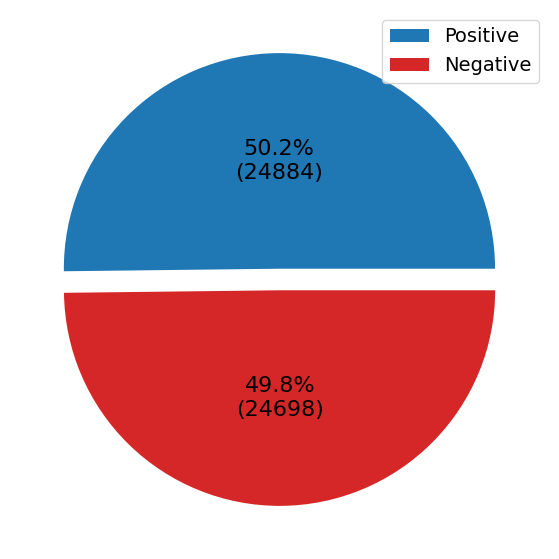

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Hàm tạo các đối số cho autopct
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Đếm số lượng các nhãn cảm xúc
freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

# Dữ liệu và nhãn
data = [freq_pos, freq_neg]
labels = ['Positive', 'Negative']

# Tạo biểu đồ tròn
fig, ax = plt.subplots(figsize=(11, 7))
plt.pie(
    x=data,
    autopct=lambda pct: func(pct, data),
    explode=[0.05] * 2,  # Tăng giá trị explode để phân tách các phần rõ ràng hơn
    pctdistance=0.5,
    colors=[sns.color_palette()[0], 'tab:red'],
    textprops={'fontsize': 16}
)

# Thêm chú giải
plt.legend(labels, loc="best", prop={'size': 14})

# Lưu biểu đồ thành file PNG
plt.savefig("PieChart.png")

# Hiển thị biểu đồ
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


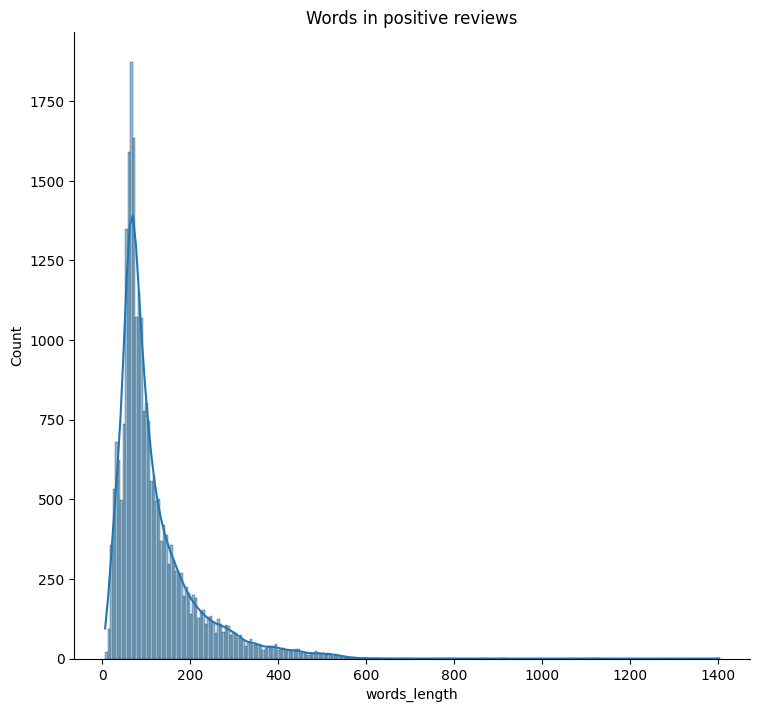

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


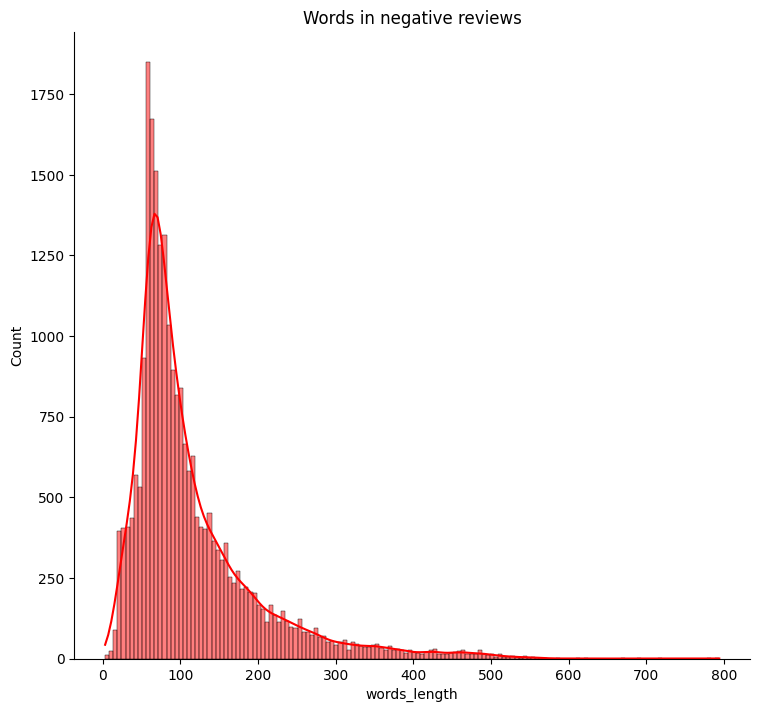

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


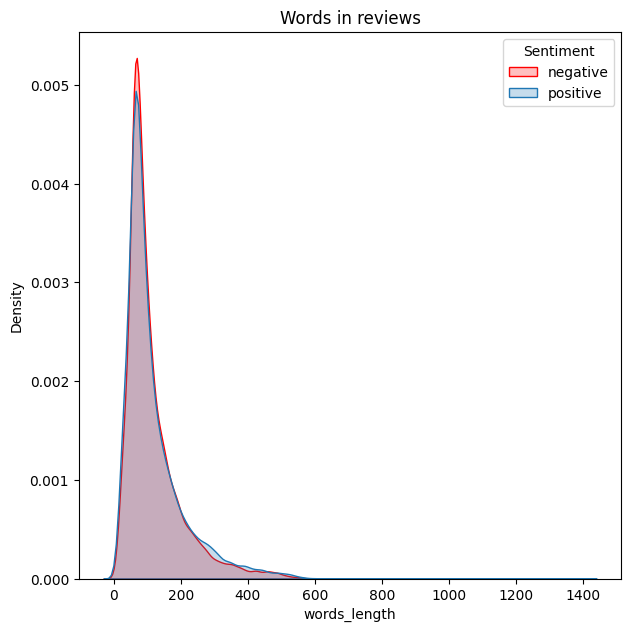

In [19]:
# Tính toán độ dài từ cho mỗi bài đánh giá
words_len = df['review'].str.split().map(lambda x: len(x))

# Sao chép dữ liệu sang một DataFrame tạm thời để làm việc
df_temp = df.copy()
df_temp['words_length'] = words_len

# Vẽ biểu đồ phân phối số lượng từ trong các bài đánh giá tích cực
hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x="words_length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False
).set(title='Words in positive reviews')
plt.show()

# Vẽ biểu đồ phân phối số lượng từ trong các bài đánh giá tiêu cực
hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x="words_length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False, palette=['red']
).set(title='Words in negative reviews')
plt.show()

# Vẽ biểu đồ phân phối kernel density cho cả hai loại đánh giá
plt.figure(figsize=(7, 7.1))
kernel_distribution_plot = sns.kdeplot(
    data=df_temp, x="words_length", hue="sentiment", fill=True, palette=[sns.color_palette()[0], 'red']
).set(title='Words in reviews')
plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(df['sentiment'])

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

In [24]:
# Khởi tạo TfidfVectorizer với tối đa 10.000 đặc trưng
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Nếu dữ liệu đã được biểu diễn dưới dạng TF-IDF trước đó
x_train_encoded = x_train  # Dữ liệu đã là ma trận TF-IDF
x_test_encoded = x_test    # Dữ liệu đã là ma trận TF-IDF

# Kiểm tra kích thước của dữ liệu đã mã hóa
print(f"Kích thước của x_train_encoded: {x_train_encoded.shape}")
print(f"Kích thước của x_test_encoded: {x_test_encoded.shape}")

Kích thước của x_train_encoded: (39665, 10000)
Kích thước của x_test_encoded: (9917, 10000)


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Decision Tree
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

# Huấn luyện mô hình trên tập huấn luyện
dt_classifier.fit(x_train_encoded, y_train)

# Dự đoán trên tập kiểm tra
y_pred = dt_classifier.predict(x_test_encoded)

# Tính độ chính xác của mô hình
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.7127155389734798


In [26]:
# Khởi tạo mô hình Random Forest
rf_classifier = RandomForestClassifier(
    random_state=42
)

# Huấn luyện mô hình trên tập huấn luyện
rf_classifier.fit(x_train_encoded, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_classifier.predict(x_test_encoded)

# Tính độ chính xác của mô hình
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.8392659070283351
